# **Code - Business Case Google Play**
### *By: Erick Cuevas*


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Read the datasets
df1 = pd.read_csv('/content/googleplaystore_user_reviews.csv') #provides details and numeric ratings of google play apps
df2 = pd.read_csv('/content/googleplaystore.csv') #provides reviews of apps (doesn't include apps starting with the letter H onwards)


### DF1 (user reviews file) processing

In [ ]:
#Obtain a first glance / initial info of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
#Search por null values
print(df1.isnull().sum())
print(df1.shape)

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64
(64295, 5)


In [ ]:
#Drop null values using column "sentiment" as reference
df1.dropna(subset=['Sentiment'],inplace=True)

In [ ]:
#Make sure there are no null values
print(df1.isnull().sum())
print(df1.shape)

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64
(37432, 5)


In [ ]:
#Count the number of registers/reviews with a "positive" sentiment of each app
count_positive = df1[df1['Sentiment'] == 'Positive'].groupby('App')['Sentiment'].count()
print(count_positive)

App
10 Best Foods for You                                 162
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                       31
11st                                                   23
1800 Contacts - Lens Store                             64
1LINE – One Line with One Touch                        27
                                                     ... 
Hotels.com: Book Hotel Rooms & Find Vacation Deals     39
Hotspot Shield Free VPN Proxy & Wi-Fi Security         17
Hotstar                                                14
Hotwire Hotel & Car Rental App                         16
Housing-Real Estate & Property                          8
Name: Sentiment, Length: 853, dtype: int64


In [ ]:
#Get the apps with greater count of "positive" reviews and create dataset
df1_positive_count = count_positive.reset_index()
df1_positive_count.sort_values(by="Sentiment",ascending=False)

,App,Sentiment
805,Helix Jump,209
502,Duolingo: Learn Languages Free,200
324,Calorie Counter - Macros,174
325,Calorie Counter - MyFitnessPal,169
256,Bowmasters,169
...,...,...
309,Caf - Mon Compte,1
297,"CM Browser - Ad Blocker , Fast Download , Privacy",1
221,Best Ovulation Tracker Fertility Calendar App ...,1
220,Best Fiends - Free Puzzle Game,1


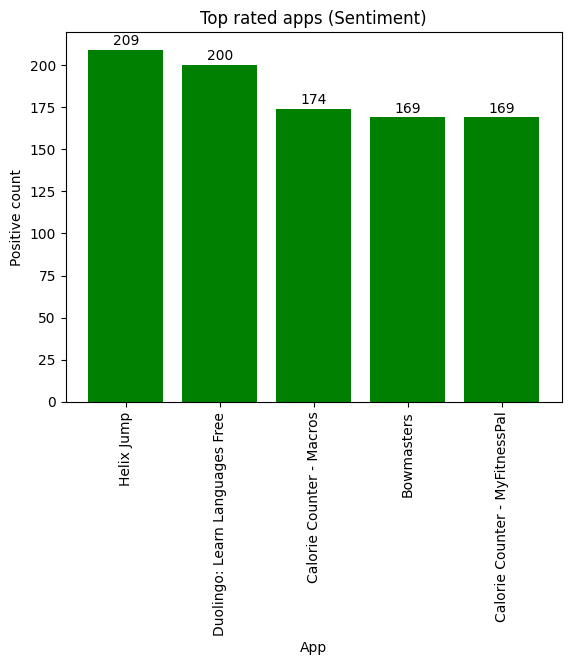

In [ ]:
#Plot the apps with the best rating according to positive count
top_positive = df1_positive_count.nlargest(5, 'Sentiment')#Get the top

plt.bar(top_positive['App'], top_positive['Sentiment'], color="green")#Create a bar chart

for index, value in enumerate(top_positive['Sentiment']):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10,color='black')

#Add labels and title
plt.xlabel('App')
plt.ylabel('Positive count')
plt.title('Top rated apps (Sentiment)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Count the number of registers/reviews with a "negative" sentiment of each app
count_negative = df1[df1['Sentiment'] == 'Negative'].groupby('App')['Sentiment'].count()
print(count_negative)

App
10 Best Foods for You                                 10
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                       1
11st                                                   7
1800 Contacts - Lens Store                             6
1LINE – One Line with One Touch                        8
                                                      ..
Hotels.com: Book Hotel Rooms & Find Vacation Deals    21
Hotspot Shield Free VPN Proxy & Wi-Fi Security         3
Hotstar                                               14
Hotwire Hotel & Car Rental App                         6
Housing-Real Estate & Property                        10
Name: Sentiment, Length: 782, dtype: int64


In [ ]:
#Sort the apps and obtain the ones with greater count of "negative" reviews and create dataset
df1_negative_count = count_negative.reset_index()
df1_negative_count.sort_values(by="Sentiment",ascending=False)

,App,Sentiment
103,Angry Birds Classic,147
298,Candy Crush Saga,126
236,Bowmasters,119
19,8 Ball Pool,106
299,Candy Crush Soda Saga,96
...,...,...
418,Discover Mobile,1
419,Disney Heroes: Battle Mode,1
709,HESI A2 Pocket Prep,1
79,"All Football GO- Live Score, Games",1


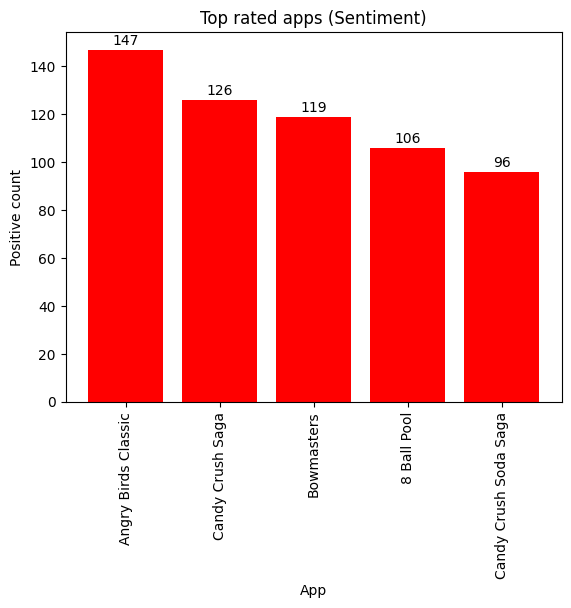

In [ ]:
#Plot the apps with the worst rating according to negative count
top_neg = df1_negative_count.nlargest(5, 'Sentiment')#Get the top

plt.bar(top_neg['App'], top_neg['Sentiment'], color="red")#Create a bar chart

for index, value in enumerate(top_neg['Sentiment']):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10,color='black')

#Add labels and title
plt.xlabel('App')
plt.ylabel('Positive count')
plt.title('Top rated apps (Sentiment)')
plt.xticks(rotation=90)
plt.show()

### DF2 (apps info file) processing pt. 1

In [ ]:
#Obtain a first glance / initial info of the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#Search for null values
print(df2.isnull().sum())
print(df2.shape)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
(10841, 13)


In [ ]:
#Look registers with missing values in column "Rating"
missing_rating_rows = df2[df2['Rating'].isnull()]
print(missing_rating_rows)

                                       App             Category  Rating  \
23                  Mcqueen Coloring pages       ART_AND_DESIGN     NaN   
113              Wrinkles and rejuvenation               BEAUTY     NaN   
123                 Manicure - nail design               BEAUTY     NaN   
126           Skin Care and Natural Beauty               BEAUTY     NaN   
129    Secrets of beauty, youth and health               BEAUTY     NaN   
...                                    ...                  ...     ...   
10824                            Cardio-FR              MEDICAL     NaN   
10825                   Naruto & Boruto FR               SOCIAL     NaN   
10831             payermonstationnement.fr  MAPS_AND_NAVIGATION     NaN   
10835                             FR Forms             BUSINESS     NaN   
10838               Parkinson Exercices FR              MEDICAL     NaN   

      Reviews  Size  Installs  Type Price Content Rating  \
23         61  7.0M  100,000+  Free    

In [ ]:
#Replace the missing values from variable "Rating" with '0'
df2['Rating'] = df2['Rating'].fillna(0)
df2['Rating'].isnull().sum()

0

In [ ]:
#Ensure null values were dropped
print(df2.isnull().sum())
print(df2.shape)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64
(10841, 13)


In [ ]:
#Search for duplicates
df2.duplicated().sum()

483

In [ ]:
#Get rid of duplicates
df2.drop_duplicates(inplace=True)

In [ ]:
#Invalid literal for int() with base 10: '3.0M'
df2['Reviews'] = df2['Reviews'].replace('3.0M', 3000000)

In [ ]:
#Remove row due to data mismatch
df2 = df2[df2['Rating'] != 19]

In [ ]:
#Convert data types of key columns
df2['Reviews'] = df2['Reviews'].astype(int)
df2['Rating'] = df2['Rating'].astype(float)


#Remove special characters and conver data types from other columns
remove = ['+',',','$']
columns = ['Installs', 'Price']
for col in columns:
    for char in remove:
        df2[col] = df2[col].apply(lambda x: x.replace(char, ''))

df2['Installs'] = df2['Installs'].astype(int)
df2['Price'] = df2['Price'].astype(float)

print(df2.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB
None


In [ ]:
#Obtain apps/registers with highest number of reviews
df2.sort_values(by='Reviews',ascending=False).head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888,98M,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


In [ ]:
#Look for any duplicate values for the same App
df2['App'].value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
Pacify (Android P theme) - Theme for Xperia™     1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9659, dtype: int64

In [ ]:
#Drop duplicated registers of apps and keep the ones with the highest number of reviews (the latest one)
df2_no_dups = df2.sort_values(by='Reviews', ascending=False).drop_duplicates(subset='App', keep='first')


In [ ]:
#Obtain info of the dataset after dropping duplicates
df2_no_dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 2544 to 6329
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


### DF1 + DF2 MERGE

In [ ]:
#Join both dataframes using merge and using "App" as the key column
left_merged = pd.merge(df1, df2_no_dups, how="left", on=["App"])
left_merged.shape

(37432, 17)

In [ ]:
#It's worth mentioning that the best option would be "left join" considering that the first
#dataframe is the one of the user reviews, which doesn't include all apps. This mean that
#both dataframes will be joined by "App" column. Basically the info from the DF2 (app info dataset)
#will be added to the DF1 only if both share the same "App" name/value.

left_merged.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
4,10 Best Foods for You,Best way,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
5,10 Best Foods for You,Amazing,Positive,0.60,0.900000,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
6,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
7,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
8,10 Best Foods for You,good you.,Positive,0.70,0.600000,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
9,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.20,0.100000,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


### DF2 (apps info file) processing pt. 2

In [ ]:
#Obtain apps/registers with highest number of reviews (avoiding duplicates)
df2_no_dups.sort_values(by='Reviews',ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888,98M,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


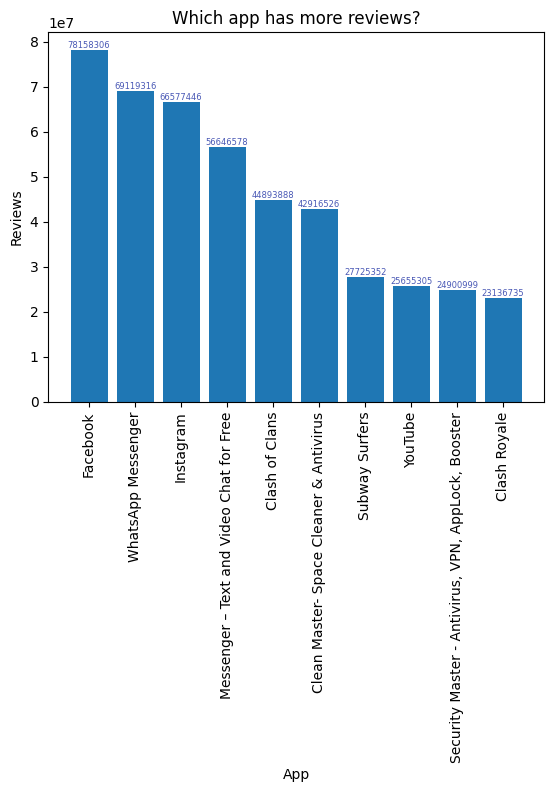

In [ ]:
#Create bar chart for the apps with more reviews
top_values = df2_no_dups.nlargest(10, 'Reviews') #Get the top 10

plt.bar(top_values['App'], top_values['Reviews'])#Create a bar chart

#Annotate each bar with its value
for index, value in enumerate(top_values['Reviews']):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=6,color='#4958B5')


#Add labels and title
plt.xlabel('App')
plt.ylabel('Reviews')
plt.title('Which app has more reviews?')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Obtain apps/registers with the best rating
df2_no_dups.sort_values(by='Rating',ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10407,Jigsaw Volvo FH 16 Trucks,FAMILY,5.0,5,8.1M,1000,Free,0.00,Teen,Puzzle,"December 1, 2016",1.0,4.0 and up
7100,CA Speakers,LIFESTYLE,5.0,12,1.2M,100,Paid,0.99,Teen,Lifestyle,"March 25, 2014",1.0,3.0 and up
10564,FK Dedinje BGD,SPORTS,5.0,36,2.6M,100,Free,0.00,Everyone,Sports,"February 11, 2017",1.1,4.0 and up
8014,Morse Player,FAMILY,5.0,12,2.4M,100,Paid,1.99,Everyone,Education,"January 23, 2017",2.1.1,3.0 and up
8526,DL Image Manager,PRODUCTIVITY,5.0,2,1.7M,10,Paid,0.99,Everyone,Productivity,"July 29, 2018",1.0.5,4.0 and up
6043,Exam Result BD,FAMILY,5.0,2,2.6M,500,Free,0.00,Everyone,Education,"July 22, 2017",1.0,3.2 and up
8601,DN Calculators,FINANCE,5.0,12,775k,100,Free,0.00,Everyone,Finance,"September 5, 2013",1.11,3.0 and up
7533,Color CL,LIFESTYLE,5.0,2,1.3M,100,Free,0.00,Everyone,Lifestyle,"February 2, 2017",1.01,4.0.3 and up
8888,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1,2.9M,100,Free,0.00,Everyone,Art & Design,"April 18, 2018",1.0.2,4.0 and up
7517,CL Notifier,TOOLS,5.0,36,3.2M,100,Free,0.00,Teen,Tools,"August 2, 2017",1.0,4.0 and up


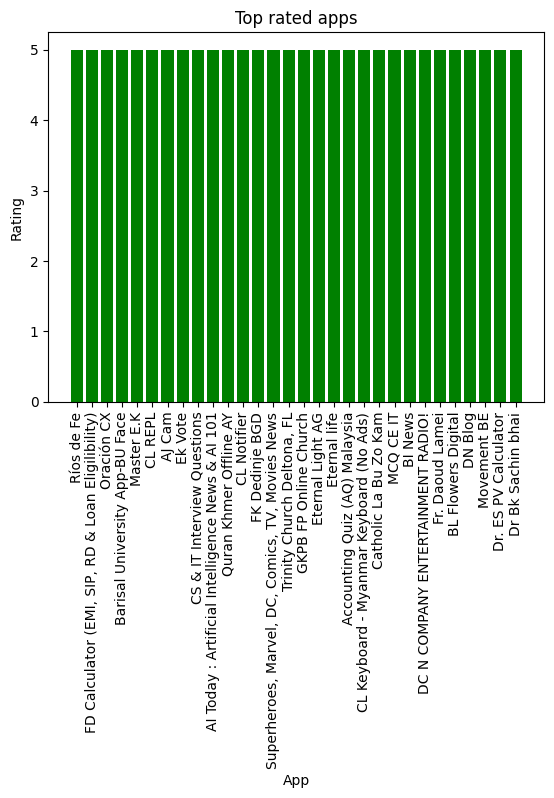

In [ ]:
#Plot the apps with the best rating
top_rating = df2_no_dups.nlargest(30, 'Rating')#Get the top

plt.bar(top_rating['App'], top_rating['Rating'], color="green")#Create a bar chart

#Add labels and title
plt.xlabel('App')
plt.ylabel('Rating')
plt.title('Top rated apps')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Obtain apps/registers with the worst rating
df2_no_dups.sort_values(by='Rating',ascending=True).head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6329,Basic Strategy Training BJ 21,GAME,0.0,0,23M,500,Free,0.00,Teen,Casino,"March 7, 2016",1.1,2.3 and up
6819,BU Questrom Launch,TRAVEL_AND_LOCAL,0.0,3,10M,100,Free,0.00,Everyone,Travel & Local,"July 17, 2015",1.0.4,3.0 and up
6808,BT Speed,SPORTS,0.0,3,948k,10,Paid,4.80,Everyone,Sports,"May 21, 2015",1.0.1,4.0.3 and up
7702,CP Cloud,BUSINESS,0.0,3,5.4M,100,Free,0.00,Everyone,Business,"July 24, 2018",2.5,4.4 and up
9504,Ek Biladi Jadi Video Song,FAMILY,0.0,3,3.7M,5000,Free,0.00,Everyone,Entertainment,"October 20, 2016",4.1,4.0 and up
8575,DM Collection,SHOPPING,0.0,3,1.2M,100,Free,0.00,Everyone,Shopping,"June 25, 2015",1.1,2.2 and up
5110,Wind & Weather Meter for Ag,WEATHER,0.0,3,14M,1000,Free,0.00,Everyone,Weather,"March 14, 2016",v1.0,4.3 and up
5120,West Central Ag,BUSINESS,0.0,3,1.7M,100,Free,0.00,Everyone,Business,"January 16, 2017",1.2,4.0 and up
5119,AG test,TOOLS,0.0,3,18M,100,Free,0.00,Everyone,Tools,"October 18, 2017",1.0.2,4.1 and up
6838,BU Alsace,BOOKS_AND_REFERENCE,0.0,3,4.0M,100,Free,0.00,Everyone,Books & Reference,"October 3, 2017",3.1.1,2.3 and up


In [ ]:
#obtain the number of registers with a rating of 0 (worst rating)

count_0 = df2_no_dups[df2_no_dups['Rating'] == 0].shape[0]
print(count_0)

1463


In [ ]:
#obtain the number of registers with a rating of 5 (best rating)
count_5 = df2_no_dups[df2_no_dups['Rating'] == 5.0].shape[0]
print(count_5)

271


In [ ]:
#Create datasets according to diff number of reviews
filtered_df_10M = df2_no_dups[df2_no_dups['Reviews'] > 10000000]
filtered_df_1M = df2_no_dups[df2_no_dups['Reviews'] > 1000000]
filtered_df_500k = df2_no_dups[df2_no_dups['Reviews'] > 500000]
filtered_df_100k = df2_no_dups[df2_no_dups['Reviews'] > 100000]

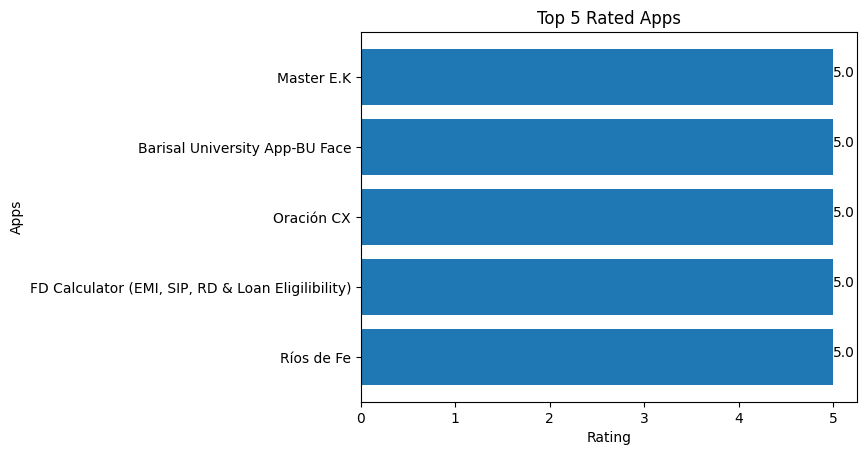

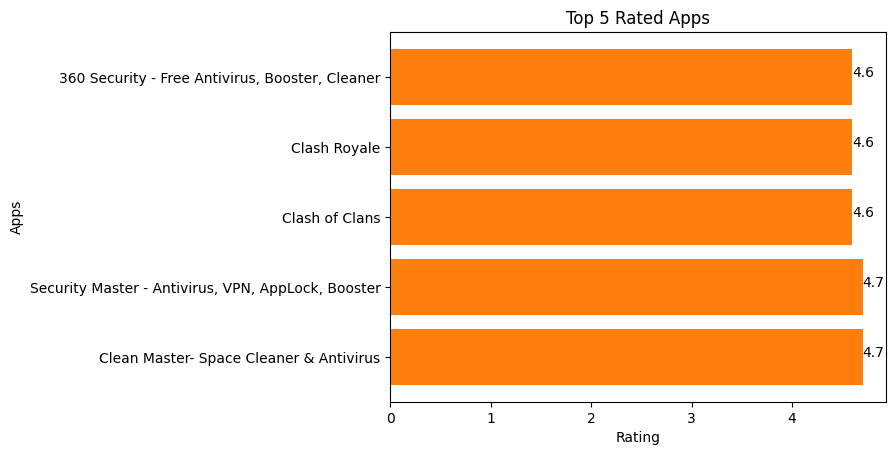

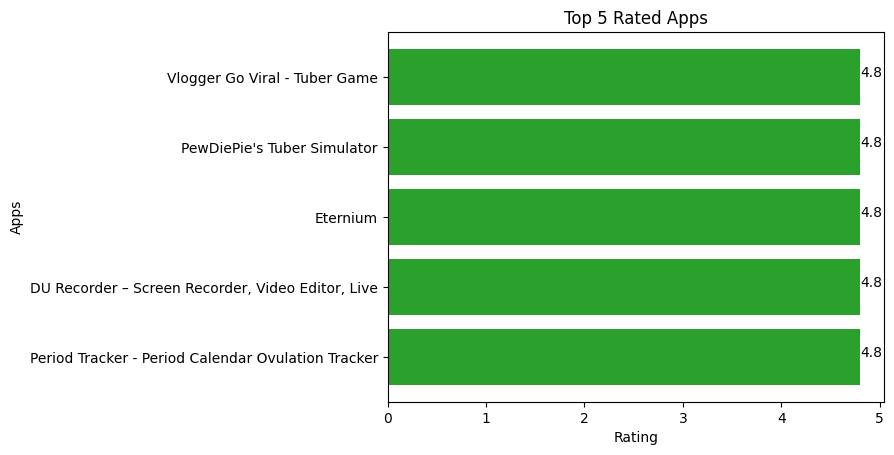

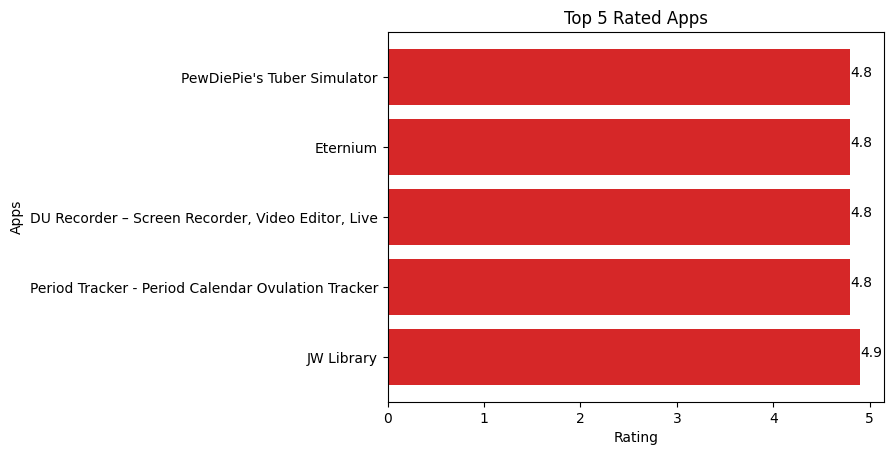

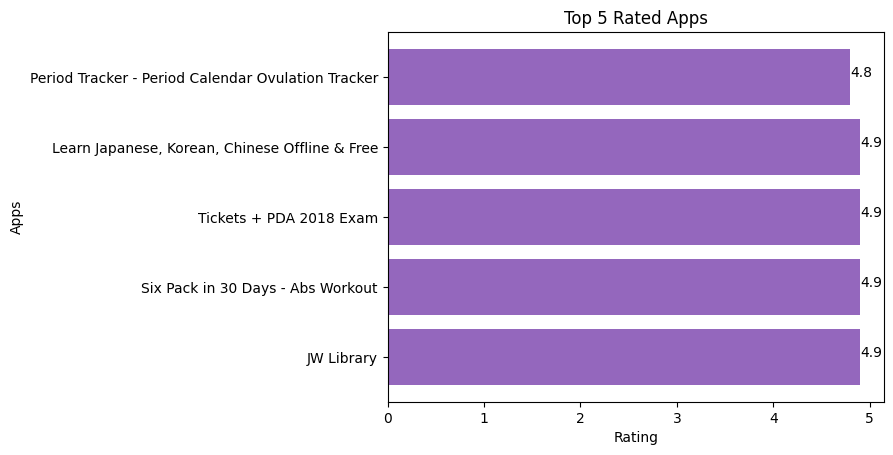

In [ ]:
#Create a loop to obtain a bar chart with the top 5 ratings for filtered datasets with diff number of reviews

filtered_datasets = [df2_no_dups, filtered_df_10M, filtered_df_1M, filtered_df_500k, filtered_df_100k]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for j, color in zip(filtered_datasets,colors):
  top_5 = j.nlargest(5, 'Rating')
  #top_5 = j.nlargest(5, 'Rating',keep='all')

  plt.barh(top_5['App'], top_5['Rating'], color=color)

  for i, value in enumerate(top_5['Rating']):
    plt.text(value, i, str(value), color= 'black')

  plt.xlabel('Rating')
  plt.ylabel('Apps')
  plt.title('Top 5 Rated Apps')
  plt.show()



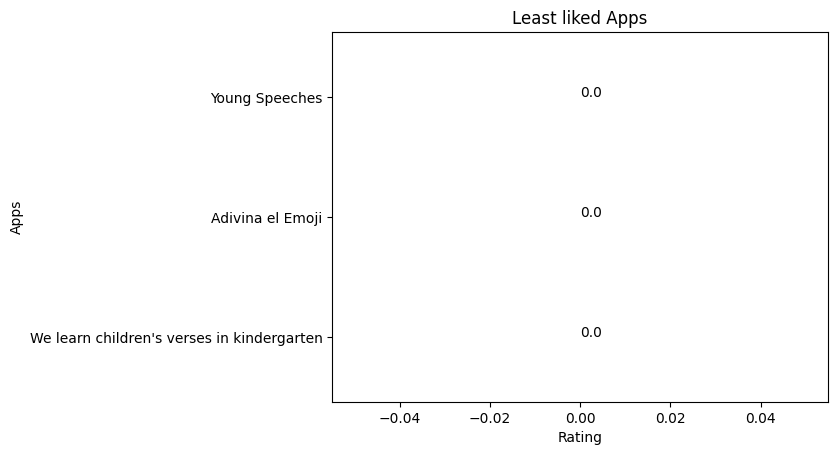

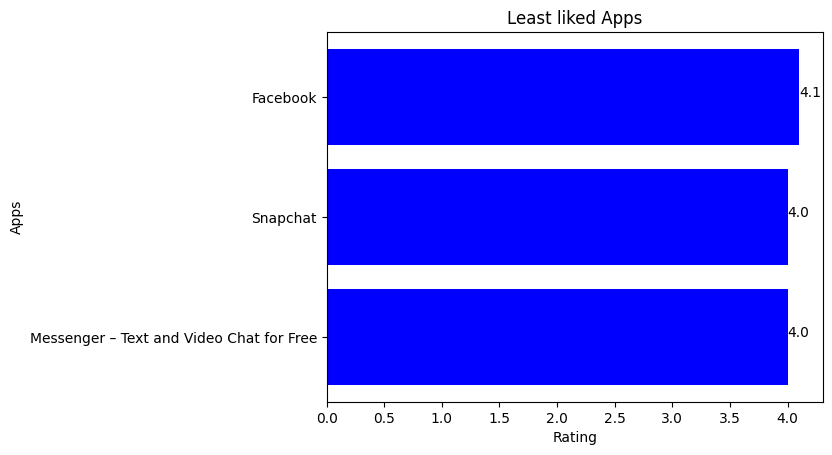

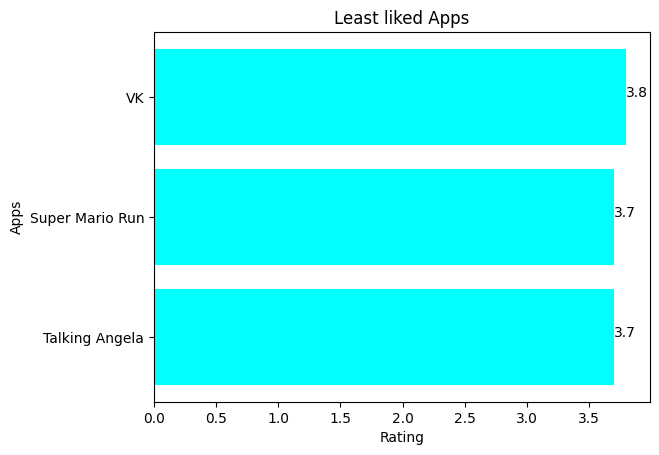

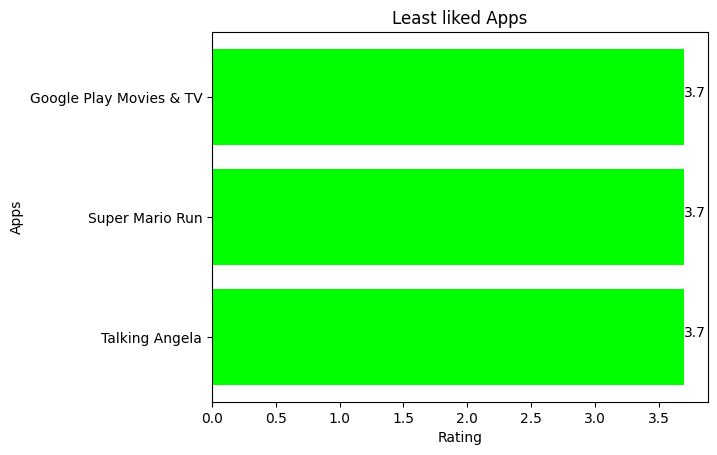

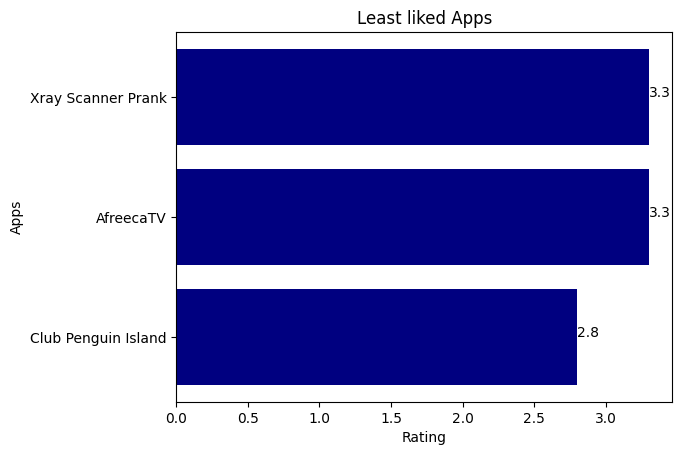

In [ ]:
#Create a loop to obtain a bar chart with the worst rated apps for filtered datasets with diff number of reviews

filtered_datasets = [df2_no_dups, filtered_df_10M, filtered_df_1M, filtered_df_500k, filtered_df_100k]
colors = ['black', 'blue', 'aqua', 'lime', 'navy']

for j, color in zip(filtered_datasets,colors):
  worst_3 = j.nsmallest(3, 'Rating')

  plt.barh(worst_3['App'], worst_3['Rating'], color=color)

  for i, value in enumerate(worst_3['Rating']):
    plt.text(value, i, str(value), color= 'black')

  plt.xlabel('Rating')
  plt.ylabel('Apps')
  plt.title('Least liked Apps')
  plt.show()

In [ ]:
#Group the register by category and obtain the mean rating of each one
df2_cat_rating = df2_no_dups.groupby('Category')['Rating'].mean()
df2_cat_rating.sort_values(ascending=False)

Category
EDUCATION              4.307619
ART_AND_DESIGN         4.216393
ENTERTAINMENT          4.129070
GAME                   4.033333
COMICS                 4.032143
PHOTOGRAPHY            3.889680
WEATHER                3.867089
SHOPPING               3.769802
FAMILY                 3.682854
VIDEO_PLAYERS          3.675000
MAPS_AND_NAVIGATION    3.635878
SOCIAL                 3.607531
FINANCE                3.602609
AUTO_AND_VEHICLES      3.598824
HEALTH_AND_FITNESS     3.594792
PARENTING              3.583333
TOOLS                  3.509047
FOOD_AND_DRINK         3.500893
TRAVEL_AND_LOCAL       3.474886
HOUSE_AND_HOME         3.460274
PERSONALIZATION        3.433511
BEAUTY                 3.390566
SPORTS                 3.372923
PRODUCTIVITY           3.366845
COMMUNICATION          3.349524
LIFESTYLE              3.339024
NEWS_AND_MAGAZINES     3.310236
BOOKS_AND_REFERENCE    3.307658
LIBRARIES_AND_DEMO     3.183333
EVENTS                 3.118750
DATING                 3.114118

In [ ]:
#Group the registers by category and obtain the size of each one
df2_cat_counts = df2_no_dups.groupby('Category').size()
df2_cat_counts.sort_values(ascending=False)

Category
FAMILY                 1878
GAME                    945
TOOLS                   829
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               105
ENTERTAINMENT            86
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
dtype: int64

In [ ]:
#Obtain the percentage of each category based on the size
#Create a dataset with that info

df2_cat_perc = df2_cat_counts.reset_index()
total_cat = df2_cat_perc[0].sum()
df2_cat_perc['Percentage'] = (df2_cat_perc[0]/total_cat)*100
df2_cat_perc.sort_values(by=0,ascending=False)

,Category,0,Percentage
11,FAMILY,1878,19.443007
14,GAME,945,9.783621
29,TOOLS,829,8.582669
4,BUSINESS,420,4.348276
20,MEDICAL,395,4.089450
23,PERSONALIZATION,376,3.892743
25,PRODUCTIVITY,374,3.872036
18,LIFESTYLE,369,3.820271
12,FINANCE,345,3.571798
28,SPORTS,325,3.364738


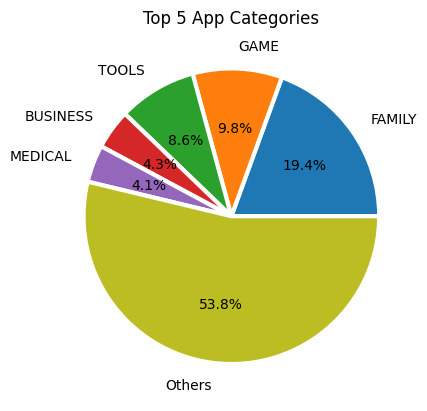

In [ ]:
#Plot the top 5 categories in a pie chart

sorted_data = sorted(zip(df2_cat_perc['Category'], df2_cat_perc[0]), key=lambda x: x[1], reverse=True)

#Separate the top 5 categories and sum of sizes for the rest
top_labels = [item[0] for item in sorted_data[:5]]
top_sizes = [item[1] for item in sorted_data[:5]]
other_size = sum(item[1] for item in sorted_data[5:])

#Add the others category
top_labels.append("Others")
top_sizes.append(other_size)

#Create the pie chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#bcbd22']
plt.pie(top_sizes, labels=top_labels, autopct='%1.1f%%',labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors)
plt.title('Top 5 App Categories')
plt.show()
